# In this Project i am to create a Revenue  forecast using the Arima Model

## we forst start off by setting up our enviroment

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pwd = os.getcwd()
filepath = pwd + "/main_financial_data.csv"
data = pd.read_csv('main_financial_data.csv', index_col='Date', parse_dates=True)
data

,Revenue,Operating Expenses,Gross Margin (%),Total Assets,Total Liabilities,Stock Price,Earnings per Share (EPS),Dividend Yield (%),Inflation Rate (%),Interest Rates (%),Market Index,Net Profit,GDP Growth (%),Unemployment Rate (%),Consumer Confidence Index
Date,,,,,,,,,,,,,,,
2008-01-31,1099342.83,793850.10,49.84,4353427.12,2796018.23,110.77,4.12,4.34,6.98,1.69,2500.81,305492.73,-0.28,11.65,110.92
2008-02-29,972347.14,571426.37,43.33,3918452.00,4203194.39,101.27,1.16,2.85,8.16,0.59,3150.90,400920.77,-1.81,10.49,116.10
2008-03-31,1129537.71,539366.13,58.49,6687141.64,879224.15,73.07,2.92,0.15,9.34,0.87,3383.04,590171.58,-1.94,12.60,81.78
2008-04-30,1304605.97,772370.86,34.99,5881639.76,3873205.48,67.65,1.42,4.65,3.11,4.86,3613.47,532235.11,-0.43,10.72,55.57
2008-05-31,953169.33,666480.58,31.43,4992027.36,3996868.15,72.05,1.97,3.45,4.59,1.83,2949.92,286688.75,3.60,5.00,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1165436.65,549620.60,29.70,4453141.06,3539855.59,97.99,4.35,2.68,2.67,2.73,2870.23,615816.05,2.61,4.18,100.16
2022-09-30,1002600.38,697223.03,30.77,4967246.73,2101822.38,110.00,4.78,0.48,2.57,2.47,3369.41,305377.35,0.70,10.09,88.28
2022-10-31,1290706.82,656701.20,35.09,4456575.23,3305927.80,79.17,3.73,2.25,1.89,3.78,3307.68,634005.62,4.10,11.90,87.31


## once our Dataset is uploaded, we need to check for for any missing values within our dataset  

In [5]:
print(data.isnull().sum())

Revenue                      0
Operating Expenses           0
Gross Margin (%)             0
Total Assets                 0
Total Liabilities            0
Stock Price                  0
Earnings per Share (EPS)     0
Dividend Yield (%)           0
Inflation Rate (%)           0
Interest Rates (%)           0
Market Index                 0
Net Profit                   0
GDP Growth (%)               0
Unemployment Rate (%)        0
Consumer Confidence Index    0
dtype: int64


## We go on to visualise our data to see what type of time series data we are working with. 

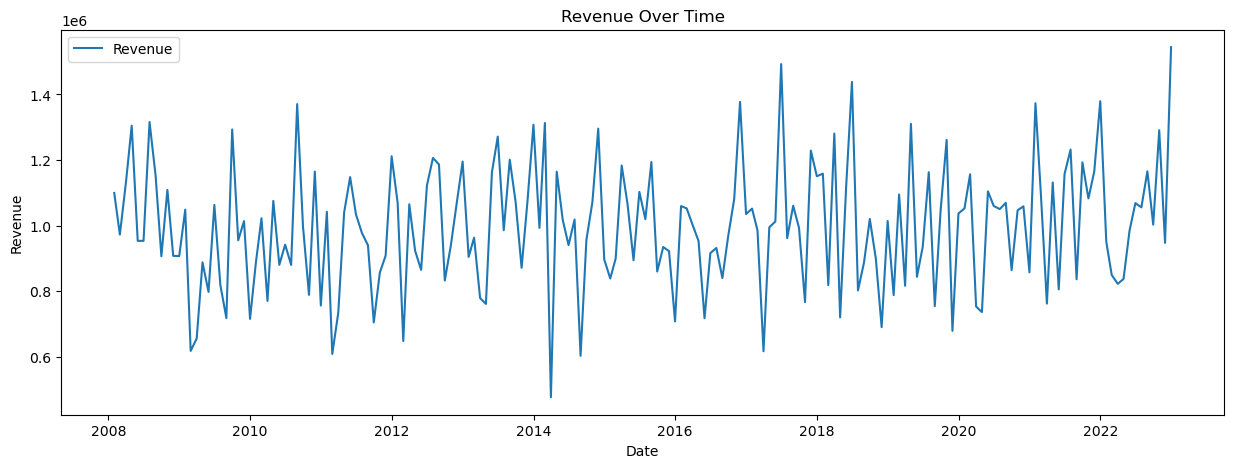

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(data['Revenue'], label='Revenue')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

## Create time-based features

In [7]:
data['Month'] = data.index.month
data['Year'] = data.index.year

## Lag features (previous month's revenue)

In [8]:
data['Revenue_Lag1'] = data['Revenue'].shift(1)
data['Revenue_Lag2'] = data['Revenue'].shift(2)

## Moving average

In [9]:
data['Revenue_MA3'] = data['Revenue'].rolling(window=3).mean()

## Drop NA values introduced by lagging

In [10]:
data.dropna(inplace=True)

In [11]:
# Create time-based features
data['Month'] = data.index.month
data['Year'] = data.index.year

# Lag features (previous month's revenue)
data['Revenue_Lag1'] = data['Revenue'].shift(1)
data['Revenue_Lag2'] = data['Revenue'].shift(2)

# Moving average
data['Revenue_MA3'] = data['Revenue'].rolling(window=3).mean()

# Drop NA values introduced by lagging
data.dropna(inplace=True)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select features and target
features = ['Revenue_Lag1', 'Revenue_Lag2', 'Revenue_MA3', 'Month', 'Year']
X = data[features]
y = data['Revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Make predictions

In [18]:

y_pred = model.predict(X_test)

# Evaluate the model


In [19]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [20]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 76337.0866277778
Root Mean Square Error (RMSE): 108653.49393484005


# Plot actual vs predicted values

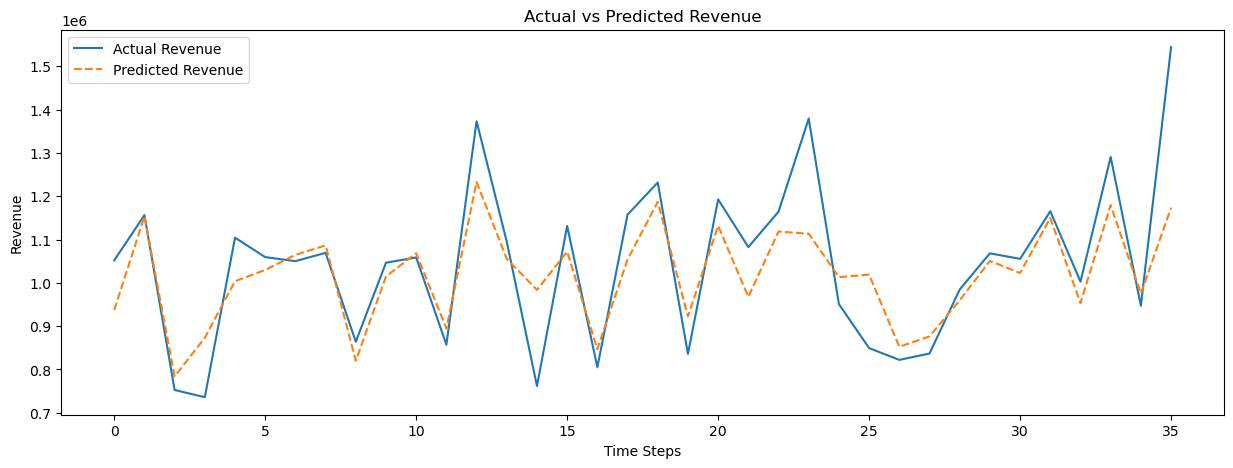

In [21]:

plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual Revenue')
plt.plot(y_pred, label='Predicted Revenue', linestyle='--')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Time Steps')
plt.ylabel('Revenue')
plt.legend()
plt.show()


# Create a future data frame

In [23]:

future_dates = pd.date_range(start=data.index[-1], periods=25, freq='M')[1:]

# Prepare lag features using the last available data
future_data = pd.DataFrame({
    'Month': future_dates.month,
    'Year': future_dates.year,  # Include the 'Year' feature
    'Revenue_Lag1': [data['Revenue'].iloc[-1]] * len(future_dates),  # Last revenue
    'Revenue_Lag2': [data['Revenue_Lag1'].iloc[-1]] * len(future_dates),  # Lag-2 revenue
    'Revenue_MA3': [data['Revenue'].iloc[-3:].mean()] * len(future_dates),  # Last 3-month average
}, index=future_dates)

# Predict future revenue
future_data['Predicted_Revenue'] = model.predict(future_data[features])

future_data[['Predicted_Revenue']]


,Predicted_Revenue
2023-01-31,1.098918e+06
2023-02-28,1.098918e+06
2023-03-31,1.099332e+06
2023-04-30,1.098177e+06
2023-05-31,1.099252e+06
2023-06-30,1.106661e+06
2023-07-31,1.094338e+06
2023-08-31,1.085638e+06
2023-09-30,1.074688e+06
2023-10-31,1.073001e+06


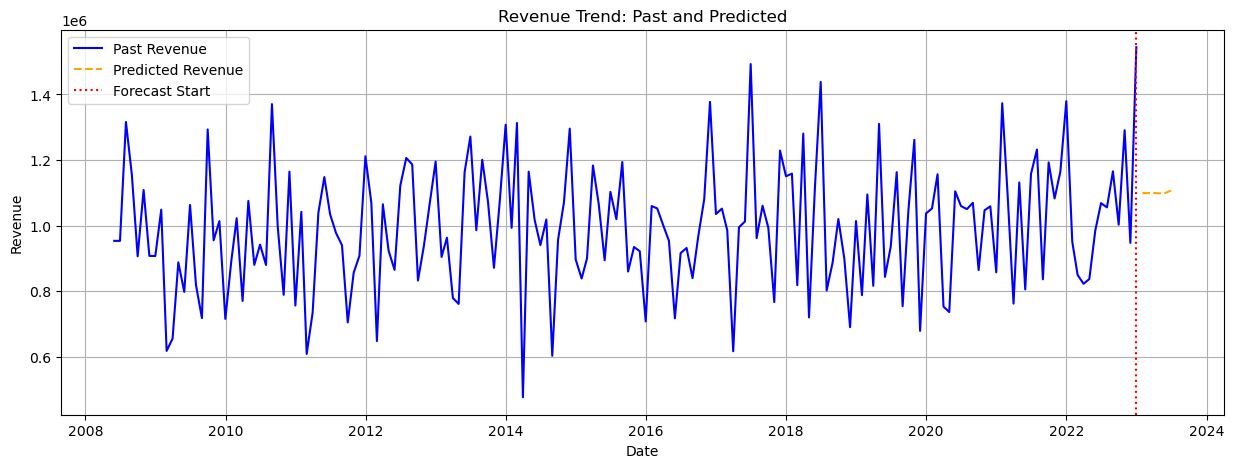

In [15]:
past_data = data[['Revenue']].copy()
future_data['Revenue'] = future_data['Predicted_Revenue']  # Align column names
combined_data = pd.concat([past_data, future_data[['Revenue']]], axis=0)

# Plot the data
plt.figure(figsize=(15, 5))
plt.plot(past_data.index, past_data['Revenue'], label='Past Revenue', color='blue')
plt.plot(future_data.index, future_data['Revenue'], label='Predicted Revenue', color='orange', linestyle='--')
plt.axvline(x=past_data.index[-1], color='red', linestyle=':', label='Forecast Start')
plt.title('Revenue Trend: Past and Predicted')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

/Users/macbook/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/macbook/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/macbook/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/macbook/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/macbook/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/User

/Users/macbook/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/macbook/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


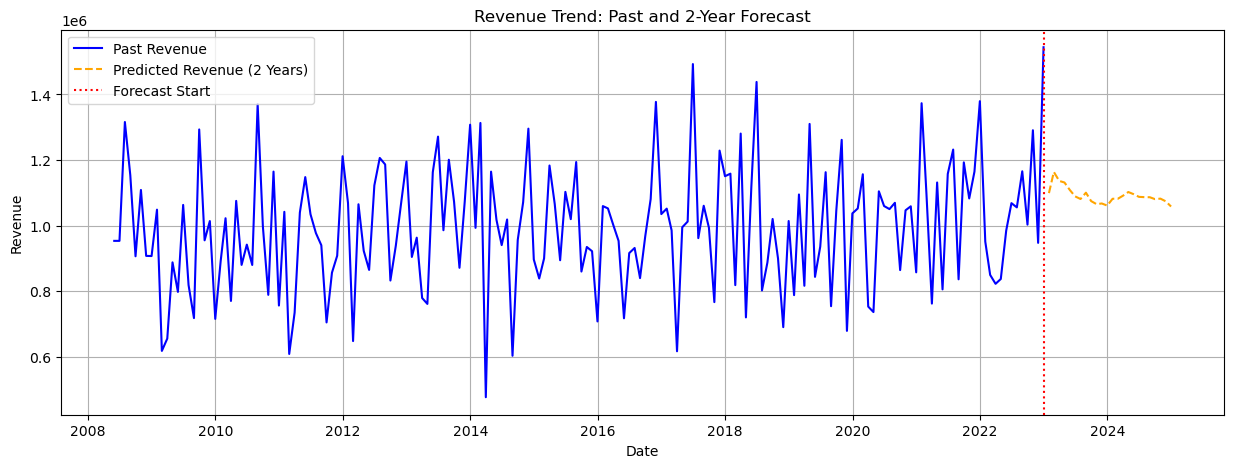

In [17]:
# Extend future predictions for 24 months
future_dates = pd.date_range(start=data.index[-1], periods=25, freq='M')[1:]

# Initialize future data with placeholders
future_data = pd.DataFrame(index=future_dates, columns=['Month', 'Year', 'Revenue_Lag1', 'Revenue_Lag2', 'Revenue_MA3'])

# Fill Month and Year columns
future_data['Month'] = future_dates.month
future_data['Year'] = future_dates.year

# Iteratively predict future revenue
last_revenue = data['Revenue'].iloc[-1]
lag1 = data['Revenue'].iloc[-1]
lag2 = data['Revenue_Lag1'].iloc[-1]
ma3 = data['Revenue'].iloc[-3:].mean()

predicted_revenues = []

for i, row in future_data.iterrows():
    # Assign lagged values
    future_data.loc[i, 'Revenue_Lag1'] = lag1
    future_data.loc[i, 'Revenue_Lag2'] = lag2
    future_data.loc[i, 'Revenue_MA3'] = ma3

    # Predict revenue for the current month
    current_features = future_data.loc[i, ['Revenue_Lag1', 'Revenue_Lag2', 'Revenue_MA3', 'Month', 'Year']]
    predicted_revenue = model.predict([current_features])[0]
    predicted_revenues.append(predicted_revenue)

    # Update lagged values for the next iteration
    lag2 = lag1
    lag1 = predicted_revenue
    ma3 = (lag1 + lag2 + ma3) / 3  # Update moving average

# Store the predictions
future_data['Predicted_Revenue'] = predicted_revenues

# Combine with historical data
past_data = data[['Revenue']].copy()
future_data['Revenue'] = future_data['Predicted_Revenue']
combined_data = pd.concat([past_data, future_data[['Revenue']]], axis=0)

# Plot the data
plt.figure(figsize=(15, 5))
plt.plot(past_data.index, past_data['Revenue'], label='Past Revenue', color='blue')
plt.plot(future_data.index, future_data['Revenue'], label='Predicted Revenue (2 Years)', color='orange', linestyle='--')
plt.axvline(x=past_data.index[-1], color='red', linestyle=':', label='Forecast Start')
plt.title('Revenue Trend: Past and 2-Year Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()
